In [2]:
import sys
sys.path.append('/home/sophie/Workspace')

import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd
from BrainEmbeddingPhase2.B2BNet.debug_leave_one_utility \
    import LeaveOne
from BrainEmbeddingPhase2.B2BNet.cluster_scoring import *
from BrainEmbeddingPhase2.B2BNet.cluster_scoring_utility import *

In [3]:
prob_matrices_results = get_prob_matrices(is_gauss='norm')

 85%|████████▍ | 183/216 [00:00<00:00, 900.35it/s]

is testing:False


100%|██████████| 216/216 [00:00<00:00, 907.88it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


(24, 188) (2, 192)
a1a3_hubs:[32, 47, 57, 61, 71] 
typical_hubs:[15, 28, 29, 61, 81]


In [4]:
diver_x_set_g1cent, \
        diver_x_set_g2cent = prob_matrices_results[-2:]

In [5]:
a1a3_clusters = prob_matrices_results[4]
typical_clusters = prob_matrices_results[5]
len_a1a3_clusters = len(a1a3_clusters)
len_typical_clusters = len(typical_clusters)

In [6]:
matrix_for_scoring, sample_weight= generate_prob_matrix_with_cluster_labels(
        *prob_matrices_results[:8], len_a1a3_group=88)

In [7]:
np.shape(matrix_for_scoring.T)

(12, 10, 172)

In [8]:
cluster0 = matrix_for_scoring.T[:-2,:,list(a1a3_clusters[0])]

In [9]:
X = np.arange(0, 10, 1)
Y = np.arange(0, 10, 1)
X, Y = np.meshgrid(X, Y)


In [10]:
np.shape(X)

(10, 10)

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
%matplotlib inline

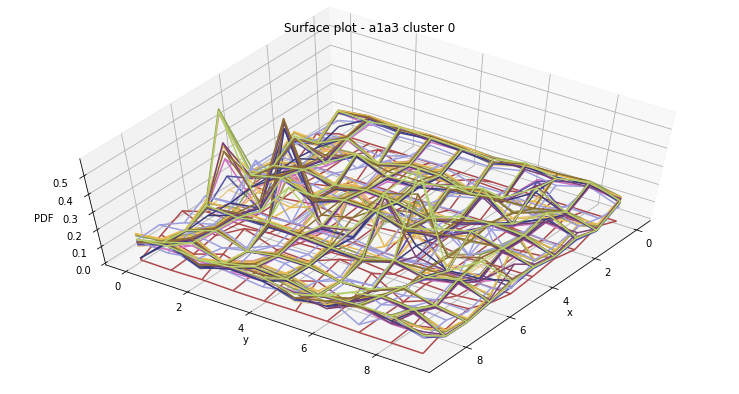

In [28]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
# Grab colormap 
this_cmap = matplotlib.cm.get_cmap('tab20b') 
len_trace = np.shape(cluster0)[2]

for individual in range(len_trace):
    surf = ax.plot_wireframe(X, Y, cluster0[:,:,individual] , rstride=1, cstride=1, 
                             color=this_cmap(float(individual)/len_trace)) #cmap='coolwarm', edgecolor='none')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')    
ax.set_title('Surface plot - a1a3 cluster 0')
#fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
plt.show()

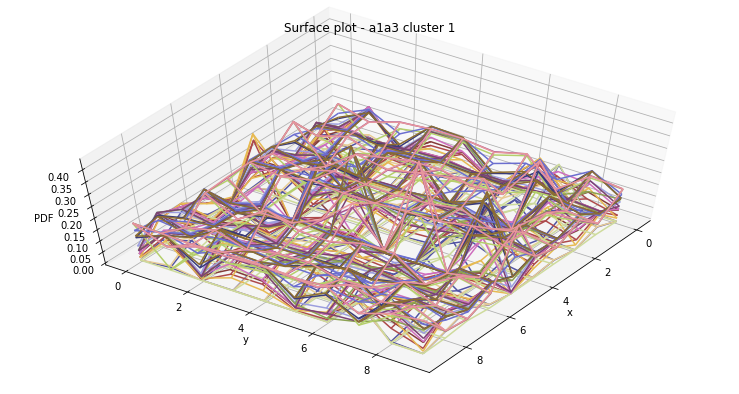

In [27]:
cluster1 = matrix_for_scoring.T[:-2,:,list(a1a3_clusters[1])]

this_cmap = matplotlib.cm.get_cmap('tab20b') 
len_trace = np.shape(cluster1)[2]

fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
    
for individual in range(len_trace ):
    surf = ax.plot_wireframe(X, Y, cluster1[:,:,individual] , rstride=1, cstride=1,
                           color=this_cmap(float(individual)/len_trace))
    
    
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')    
ax.set_title('Surface plot - a1a3 cluster 1')
#fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
#plt.show()
plt.show()

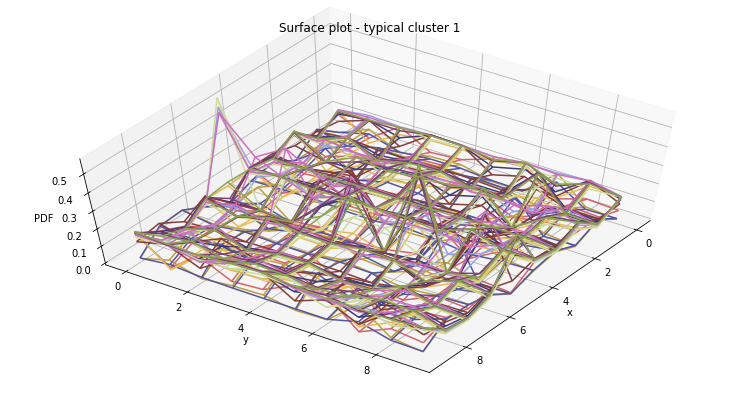

In [26]:
cluster1 = matrix_for_scoring.T[:-2,:,list(typical_clusters[1])]

this_cmap = matplotlib.cm.get_cmap('tab20b') 
len_trace = np.shape(cluster1)[2]

fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')

for individual in range(len_trace):
    surf = ax.plot_wireframe(X, Y, cluster1[:,:,individual] , rstride=1, cstride=1, 
                           color=this_cmap(float(individual)/len_trace))
                           #cmap='coolwarm', edgecolor='none')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')    
ax.set_title('Surface plot - typical cluster 1')
# fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
plt.show()